In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [11]:
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [12]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import timeit
import scipy.signal as sps
import warnings
warnings.filterwarnings("ignore")

In [13]:
#!dpkg --configure -a
!apt-get install -y p7zip-full
!7z x ../input/tensorflow-speech-recognition-challenge/train.7z

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 12 not upgraded.
Need to get 1522 kB of archives.
After this operation, 5755 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 p7zip amd64 16.02+dfsg-6 [358 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 p7zip-full amd64 16.02+dfsg-6 [1164 kB]
Fetched 1522 kB in 1s (1500 kB/s)   
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package p7zip.
(Reading database ... 102229 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-6_amd64.deb ...
Unpacking p7zip (16.02+dfsg-6) ...
Selecting previously unselected package p7zip-full.
Preparing

In [8]:
train_audio_path = '../input/tensorflow-speech-recognition-challenge/train/audio/'

16000
[ 14  -7 -14 ...  19  20  27]


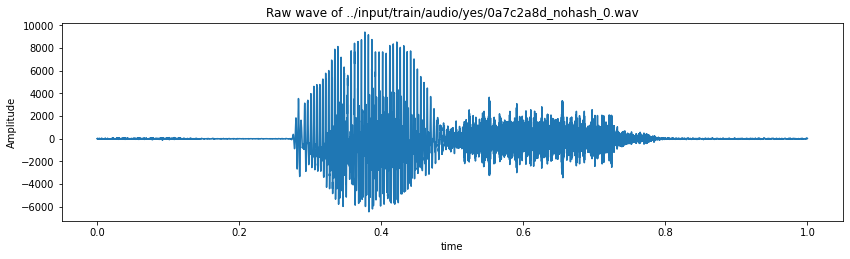

In [9]:
train_audio_path = 'train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
print(sample_rate)
print(samples)

In [ ]:
print(sample_rate)
samples = np.array(samples, dtype='float64')
ipd.Audio(samples, rate=sample_rate)

In [ ]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [ ]:
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [ ]:
#labels=os.listdir(train_audio_path + '/' + 'yes')
#print(train_audio_path)

duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [16]:
train_audio_path = 'train/audio/'

In [17]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        samples = samples / (2 ** 15)
        samples = sps.resample(samples, 8000)
        all_wave.append(samples)
        all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [18]:
from sklearn.preprocessing import LabelEncoder
classes = np.unique(all_label)
print(classes)
le = LabelEncoder()
y=le.fit_transform(all_label)
print(y)

['down' 'go' 'left' 'no' 'off' 'on' 'right' 'stop' 'up' 'yes']
[9 9 9 ... 1 1 1]


In [19]:
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes=len(labels))
print(y)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [20]:
all_wave = np.array(all_wave, dtype='float32').reshape(-1,8000,1)

In [21]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y, test_size = 0.3, shuffle=True)

In [22]:
count_of_classes = len(classes)
print(count_of_classes)

10


In [23]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fifth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Sixth Conv1D layer
conv = Conv1D(128, 5, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)



#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(count_of_classes, activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.00001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [26]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
519/519 [==============================] - 13s 11ms/step - loss: 2.2674 - accuracy: 0.1295 - val_loss: 2.1590 - val_accuracy: 0.1645
Epoch 2/100
519/519 [==============================] - 5s 10ms/step - loss: 1.8619 - accuracy: 0.2886 - val_loss: 2.0368 - val_accuracy: 0.2476
Epoch 3/100
519/519 [==============================] - 5s 9ms/step - loss: 1.5293 - accuracy: 0.4220 - val_loss: 1.3441 - val_accuracy: 0.5468
Epoch 4/100
519/519 [==============================] - 5s 9ms/step - loss: 1.2712 - accuracy: 0.5241 - val_loss: 1.0922 - val_accuracy: 0.6113
Epoch 5/100
519/519 [==============================] - 5s 9ms/step - loss: 1.1068 - accuracy: 0.5991 - val_loss: 0.9111 - val_accuracy: 0.6842
Epoch 6/100
519/519 [==============================] - 5s 9ms/step - loss: 0.9733 - accuracy: 0.6512 - val_loss: 0.8663 - val_accuracy: 0.7233
Epoch 7/100
519/519 [==============================] - 5s 9ms/step - loss: 0.8680 - accuracy: 0.7005 - val_loss: 0.7627 - val_accuracy: 0.7

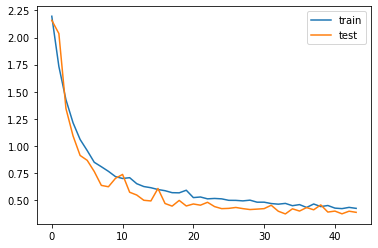

In [27]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [28]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

def predict(audio): 
    if audio.max() == 0.0: 
        return 'silence' 
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0]) 
    if np.max(prob[0]) < 0.7: 
        return 'unknown'
    return classes[index]

In [29]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Audio: on
Text: unknown


In [7]:
!pip install py7zr

from py7zr import unpack_7zarchive 
import shutil

     |████████████████████████████████| 65 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 2.2 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 28.7 MB/s eta 0:00:01
     |████████████████████████████████| 357 kB 36.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 59.3 MB/s eta 0:00:01


In [8]:
shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive) 
shutil.get_unpack_formats()

[('7zip', ['.7z'], ''),
 ('bztar', ['.tar.bz2', '.tbz2'], "bzip2'ed tar-file"),
 ('gztar', ['.tar.gz', '.tgz'], "gzip'ed tar-file"),
 ('tar', ['.tar'], 'uncompressed tar file'),
 ('xztar', ['.tar.xz', '.txz'], "xz'ed tar-file"),
 ('zip', ['.zip'], 'ZIP file')]

In [9]:
shutil.unpack_archive('/kaggle/input/tensorflow-speech-recognition-challenge/test.7z', 
                      '/kaggle/working/tensorflow-speech-recognition-challenge/')

In [30]:
test_audio_path = '/kaggle/working/tensorflow-speech-recognition-challenge/test/audio/'
#print(os.listdir(test_audio_path))

import timeit
import scipy.signal as sps

In [ ]:
waves = [f for f in os.listdir(test_audio_path) if f.endswith('.wav')]
print(waves[:100])

In [31]:
predictions = []
labels = []

waves = [f for f in os.listdir(test_audio_path) if f.endswith('.wav')]

i = 0
starttime = timeit.default_timer()
for wav in waves:
    if (i % 1000) == 0:
        print(i)
        print("The time difference is :", timeit.default_timer() - starttime)
        starttime = timeit.default_timer()
    #print(wav)
    sample_rate, samples = wavfile.read(test_audio_path + '/' + wav)
    samples = samples / ( 2 ** 15)
    #print(samples, sample_rate)
    #samples, sample_rate = librosa.load(test_audio_path + '/' + wav, sr = 8000)
    #print(samples, sample_rate)
    #samples = librosa.resample(samples, sample_rate, 8000)
    labels.append(wav)
    samples = sps.resample(samples, 8000)
    #if(len(samples) != 16000) : 
     #   samples = sps.resample(samples, 16000)
        #test_waves.append(samples)
    predictions.append(predict(samples))
    i += 1
    

0
The time difference is : 0.00018174099977841252
1000
The time difference is : 33.466782242000136
2000
The time difference is : 33.75601705000008
3000
The time difference is : 34.11683994399982
4000
The time difference is : 34.036445088000164
5000
The time difference is : 33.359457033000126
6000
The time difference is : 33.00579377799977
7000
The time difference is : 32.85570209000025
8000
The time difference is : 32.64389781099953
9000
The time difference is : 33.14150280600006
10000
The time difference is : 33.066711534000206
11000
The time difference is : 32.82222135199936
12000
The time difference is : 33.07125368600009
13000
The time difference is : 32.87021528900004
14000
The time difference is : 32.2428025399995
15000
The time difference is : 33.063408127
16000
The time difference is : 33.18108726400078
17000
The time difference is : 33.05990147600005
18000
The time difference is : 32.14161683600014
19000
The time difference is : 33.81949944799999
20000
The time difference is :

In [33]:
results = pd.DataFrame({'fname': labels, 'label' : predictions}) 
results
results.to_csv('predictions.csv', encoding='utf-8', index=False)